In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
PATH = "WineQT.csv"
data = pd.read_csv(PATH)

# Data-Pre Processing

In [2]:
data = data.drop('Id', axis = 1)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
arr = data['quality'].unique()
arr = sorted(arr)
dict = {}
for unique_values in arr:
    val = (data['quality'] == unique_values).sum().item()
    print(f"Number of wines with Quality {unique_values} is {val}")
    dict[f"Quality {unique_values}"] = f"{round((val / len(data)) * 100, 2)}%"

Number of wines with Quality 3 is 6
Number of wines with Quality 4 is 33
Number of wines with Quality 5 is 483
Number of wines with Quality 6 is 462
Number of wines with Quality 7 is 143
Number of wines with Quality 8 is 16


In [4]:
dict

{'Quality 3': '0.52%',
 'Quality 4': '2.89%',
 'Quality 5': '42.26%',
 'Quality 6': '40.42%',
 'Quality 7': '12.51%',
 'Quality 8': '1.4%'}

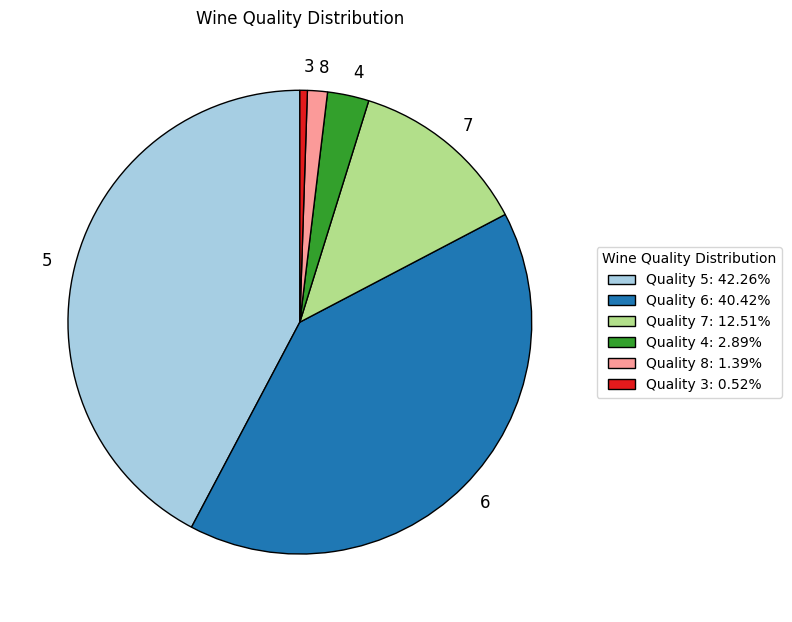

In [5]:
import matplotlib.pyplot as plt
import numpy as np

qualities = ['Quality 5', 'Quality 6', 'Quality 7', 'Quality 4', 'Quality 8', 'Quality 3']
percentages = np.array([42.26, 40.42, 12.51, 2.89, 1.39, 0.52])
quality = ['5', '6', '7', '4', '8', '3']
 

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts = ax.pie(
    percentages, 
    labels=quality, 
    startangle=90, 
    colors=plt.cm.Paired.colors, 
    textprops={'fontsize': 12},
    wedgeprops={'edgecolor': 'black'}
)

ax.legend(wedges, [f"{label}: {perc:.2f}%" for label, perc in zip(qualities, percentages)], 
          title="Wine Quality Distribution", loc="center left", bbox_to_anchor=(1, 0.5))

ax.set_title('Wine Quality Distribution')
plt.tight_layout()
plt.show()

# Handling Imbalanced Data: Solutions and Best Practices

Imbalanced datasets can lead to biased models, but the following strategies help ensure fairer results:

---

## 1. **Resampling Techniques** (Oversampling/Undersampling)
- **Oversampling SMOTE (Synthetic Minority Over-sampling Technique)**: Increase minority class instances.
- **Undersampling**: Reduce majority class instances.
- **Purpose**: Balances the dataset for improved model performance.

---

## 2. **Class Weight Adjustment**
- Assign higher weights to the minority class.
- **Purpose**: Focuses the model’s attention on the minority class during training.

---

## 3. **Use of Multiple Evaluation Metrics**
- Use metrics like Precision, Recall, F1-score, and ROC AUC.
- **Purpose**: Provides a better understanding of model performance on imbalanced data.

---

## 4. **Anomaly Detection**
- Treat rare classes as outliers or anomalies.
- **Purpose**: Identifies rare events, such as fraud or disease, in extremely imbalanced datasets.

---

## Summary
To handle imbalanced data, apply **Resampling**, adjust **Class Weights**, use **Multiple Evaluation Metrics**, and consider **Anomaly Detection** for rare classes.


In [6]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Normalizing The Dataset

In [7]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming 'data' is your DataFrame
scaler = MinMaxScaler()

# Apply Min-Max normalization to all columns except the target column
data = data.copy()
data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])

# Show the normalized data
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846,5
1,0.283186,0.520548,0.00,0.116438,0.143573,0.358209,0.215548,0.494126,0.362205,0.209581,0.215385,5
2,0.283186,0.438356,0.04,0.095890,0.133556,0.208955,0.169611,0.508811,0.409449,0.191617,0.215385,5
3,0.584071,0.109589,0.56,0.068493,0.105175,0.238806,0.190813,0.582232,0.330709,0.149701,0.215385,6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846,5


In [8]:
import torch
Y = torch.tensor(np.array(data['quality'])).type(torch.float)
X =  torch.tensor(np.array(data.drop('quality', axis = 1))).type(torch.float)

In [9]:
# Re-Sampling Data

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_resampled, Y_resampled = sm.fit_resample(X, Y)

In [10]:
arr = Y.unique()
dict1 = {}
for unique_values in arr:
    val = (Y == unique_values).sum().item()
    print(f"Number of wines with Quality {unique_values} is {val}")
    dict1[f"Quality {unique_values}"] = f"{round((val / len(data)) * 100, 2)}%"
# Before Resampling : 
# Number of wines with Quality 3.0 is 6
# Number of wines with Quality 4.0 is 33
# Number of wines with Quality 5.0 is 483
# Number of wines with Quality 6.0 is 462
# Number of wines with Quality 7.0 is 143
# Number of wines with Quality 8.0 is 16

Number of wines with Quality 3.0 is 6
Number of wines with Quality 4.0 is 33
Number of wines with Quality 5.0 is 483
Number of wines with Quality 6.0 is 462
Number of wines with Quality 7.0 is 143
Number of wines with Quality 8.0 is 16


In [11]:
arr = torch.tensor(Y_resampled).unique()
dict2 = {}
for unique_values in arr:
    val = (Y_resampled == unique_values).sum().item()
    print(f"Number of wines with Quality {unique_values} is {val}")
    dict2[f"Quality {unique_values}"] = f"{round((val / len(data)) * 100, 2)}%"
# After Resampling : 
# Number of wines with Quality 3.0 is 483
# Number of wines with Quality 4.0 is 483
# Number of wines with Quality 5.0 is 483
# Number of wines with Quality 6.0 is 483
# Number of wines with Quality 7.0 is 483
# Number of wines with Quality 8.0 is 483

Number of wines with Quality 3.0 is 483
Number of wines with Quality 4.0 is 483
Number of wines with Quality 5.0 is 483
Number of wines with Quality 6.0 is 483
Number of wines with Quality 7.0 is 483
Number of wines with Quality 8.0 is 483


# After Resampling the data

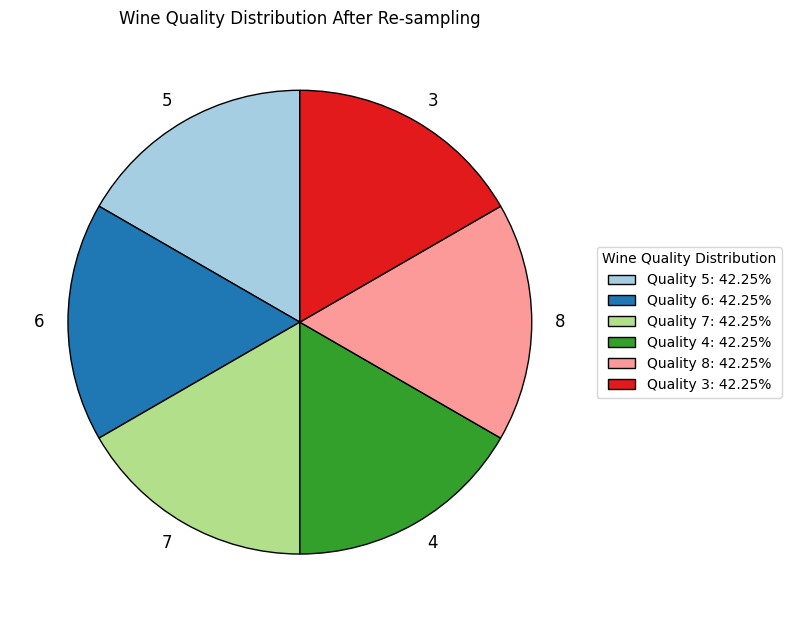

In [42]:
import matplotlib.pyplot as plt
import numpy as np

qualities = ['Quality 5', 'Quality 6', 'Quality 7', 'Quality 4', 'Quality 8', 'Quality 3']
percentages = np.array([42.25, 42.25, 42.25, 42.25, 42.25, 42.25])
quality = ['5', '6', '7', '4', '8', '3']
 

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts = ax.pie(
    percentages, 
    labels=quality, 
    startangle=90, 
    colors=plt.cm.Paired.colors, 
    textprops={'fontsize': 12},
    wedgeprops={'edgecolor': 'black'}
)

ax.legend(wedges, [f"{label}: {perc:.2f}%" for label, perc in zip(qualities, percentages)], 
          title="Wine Quality Distribution", loc="center left", bbox_to_anchor=(1, 0.5))

ax.set_title('Wine Quality Distribution After Re-sampling')
plt.tight_layout()
plt.show()

In [12]:
X_resampled, Y_resampled = torch.tensor(X_resampled).type(torch.float), torch.tensor(Y_resampled).type(torch.float)
type(X_resampled), type(Y_resampled), X_resampled.dtype, Y_resampled.dtype

(torch.Tensor, torch.Tensor, torch.float32, torch.float32)

In [13]:
# After Resampling
len(X_resampled), len(Y_resampled), X_resampled.shape, Y_resampled.shape

(2898, 2898, torch.Size([2898, 11]), torch.Size([2898]))

In [14]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size = 0.2, random_state=42)

In [15]:
def analyse_model(y_pred, Y_test, model): 
    y_pred = np.array(y_pred)
    Y_test = np.array(Y_test)
    accuracy = accuracy_score(Y_test, y_pred) * 100
    f1 = f1_score(Y_test, y_pred, average='macro') * 100
    prec_score =  precision_score(Y_test, y_pred, average='macro') * 100
    rec_score = recall_score(Y_test, y_pred, average='macro') * 100
    
    row = {
    "Model": model,
    "Accuracy": accuracy,
    "F-1 Score": f1,
    "Recall": rec_score,
    "Precision": prec_score
}
    return accuracy, f1, prec_score, rec_score, row

In [16]:
analysis1 = pd.DataFrame(columns=["Model", "Accuracy", "F-1 Score", "Recall", "Precision"])

In [17]:
def train_model(model, X_train, Y_train, X_test, Y_test, model_name):
    train_on_model = model()
    train_on_model.fit(X_train, Y_train)
    y_pred = train_on_model.predict(X_test)
    accuracy, f1, prec_score, rec_score, row = analyse_model(y_pred, Y_test, model_name)
    analysis1.loc[len(analysis1)] = [row["Model"], row["Accuracy"], row["F-1 Score"], row["Recall"], row["Precision"]]

# RandomForestClassifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
train_model(RandomForestClassifier, X_train, Y_train, X_test, Y_test, "RandomForestClassifier")

# LogisticRegression

In [19]:
from sklearn.linear_model import LogisticRegression
train_model(LogisticRegression, X_train, Y_train, X_test, Y_test, "LogisticRegression")

# KNeighbourClassifier

In [20]:
from sklearn.neighbors import KNeighborsClassifier
train_model(KNeighborsClassifier, X_train, Y_train, X_test, Y_test, "KNeighborsClassifier")

# SVC

In [21]:
from sklearn.svm import SVC
train_model(SVC, X_train, Y_train, X_test, Y_test, "SVC")

# DecisionTreeClassifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
train_model(DecisionTreeClassifier, X_train, Y_train, X_test, Y_test, "DecisionTreeClassifier")

# GaussianNB

In [23]:
from sklearn.naive_bayes import GaussianNB
train_model(GaussianNB, X_train, Y_train, X_test, Y_test, "GaussianNB")

In [24]:
analysis1

,Model,Accuracy,F-1 Score,Recall,Precision
0,RandomForestClassifier,87.586207,87.691304,87.961365,87.633140
1,LogisticRegression,57.586207,56.225826,57.755336,55.973449
2,KNeighborsClassifier,77.586207,76.363620,78.583664,75.943217
3,SVC,69.482759,68.937988,69.939172,68.638209
4,DecisionTreeClassifier,79.655172,79.490463,80.013911,79.477510
5,GaussianNB,53.275862,50.657428,53.600702,51.385089


In [25]:
analysis2 = pd.DataFrame(columns=["Model", "Accuracy", "F-1 Score", "Recall", "Precision"])

In [26]:
def train_model_2(model, X_train, Y_train, X_test, Y_test, model_name):
    train_on_model = model()
    train_on_model.fit(X_train, Y_train)
    y_pred = train_on_model.predict(X_test)
    accuracy, f1, prec_score, rec_score, row = analyse_model(y_pred, Y_test, model_name)
    analysis2.loc[len(analysis2)] = [row["Model"], row["Accuracy"], row["F-1 Score"], row["Recall"], row["Precision"]]

## Converting Multi-class to Binary Class classification

In [27]:
X_resampled, Y_resampled = X_resampled, torch.where(Y_resampled > 7, torch.tensor(1), torch.tensor(0))

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size = 0.2, random_state=42)

In [29]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
train_model_2(RandomForestClassifier, X_train, Y_train, X_test, Y_test, "RandomForestClassifier")

# LogisticRegression
from sklearn.linear_model import LogisticRegression
train_model_2(LogisticRegression, X_train, Y_train, X_test, Y_test, "LogisticRegression")

# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
train_model_2(KNeighborsClassifier, X_train, Y_train, X_test, Y_test, "KNeighborsClassifier")

# SVC
from sklearn.svm import SVC
train_model_2(SVC, X_train, Y_train, X_test, Y_test, "SVC")

# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
train_model_2(DecisionTreeClassifier, X_train, Y_train, X_test, Y_test, "DecisionTreeClassifier")

# GaussianNB
from sklearn.naive_bayes import GaussianNB
train_model_2(GaussianNB, X_train, Y_train, X_test, Y_test, "GaussianNB")

In [30]:
analysis1

,Model,Accuracy,F-1 Score,Recall,Precision
0,RandomForestClassifier,87.586207,87.691304,87.961365,87.633140
1,LogisticRegression,57.586207,56.225826,57.755336,55.973449
2,KNeighborsClassifier,77.586207,76.363620,78.583664,75.943217
3,SVC,69.482759,68.937988,69.939172,68.638209
4,DecisionTreeClassifier,79.655172,79.490463,80.013911,79.477510
5,GaussianNB,53.275862,50.657428,53.600702,51.385089


In [31]:
analysis2

,Model,Accuracy,F-1 Score,Recall,Precision
0,RandomForestClassifier,99.137931,98.363422,97.723628,99.030870
1,LogisticRegression,89.310345,76.264026,72.478617,83.333333
2,KNeighborsClassifier,98.448276,97.203037,99.077869,95.544554
3,SVC,96.724138,94.045786,95.407163,92.810643
4,DecisionTreeClassifier,98.103448,96.399528,95.785816,97.039978
5,GaussianNB,87.241379,80.192354,87.125802,76.799151


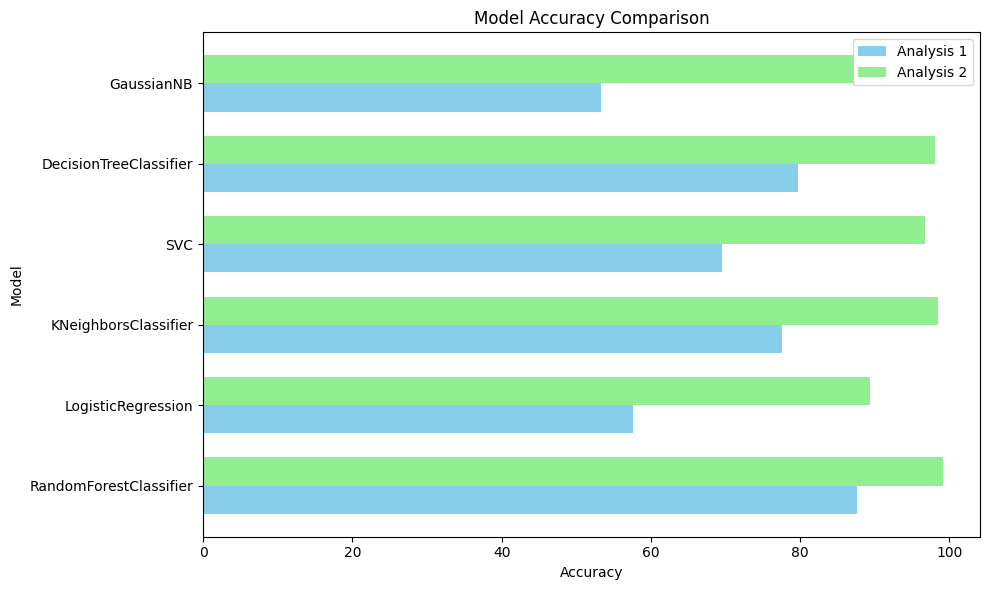

In [32]:
# Aligning the dataframes to ensure they have the same number of models
min_length = min(len(analysis1), len(analysis2))  # Choose the smaller size to avoid mismatch
analysis1 = analysis1.head(min_length)
analysis2 = analysis2.head(min_length)

# Set up the positions for the bars of both datasets
bar_height = 0.35
index = np.arange(len(analysis1))

# Create a figure
plt.figure(figsize=(10, 6))

# Plot the first dataset (analysis1) as horizontal bars
plt.barh(index - bar_height / 2, analysis1['Accuracy'], bar_height, color='skyblue', label='Analysis 1')

# Plot the second dataset (analysis2) as horizontal bars
plt.barh(index + bar_height / 2, analysis2['Accuracy'], bar_height, color='lightgreen', label='Analysis 2')

# Add labels, title, and legends
plt.ylabel('Model')
plt.xlabel('Accuracy')
plt.yticks(index, analysis1['Model'])  # Set the y-ticks to the model names
plt.title('Model Accuracy Comparison')
plt.legend()

# Display the plot
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()


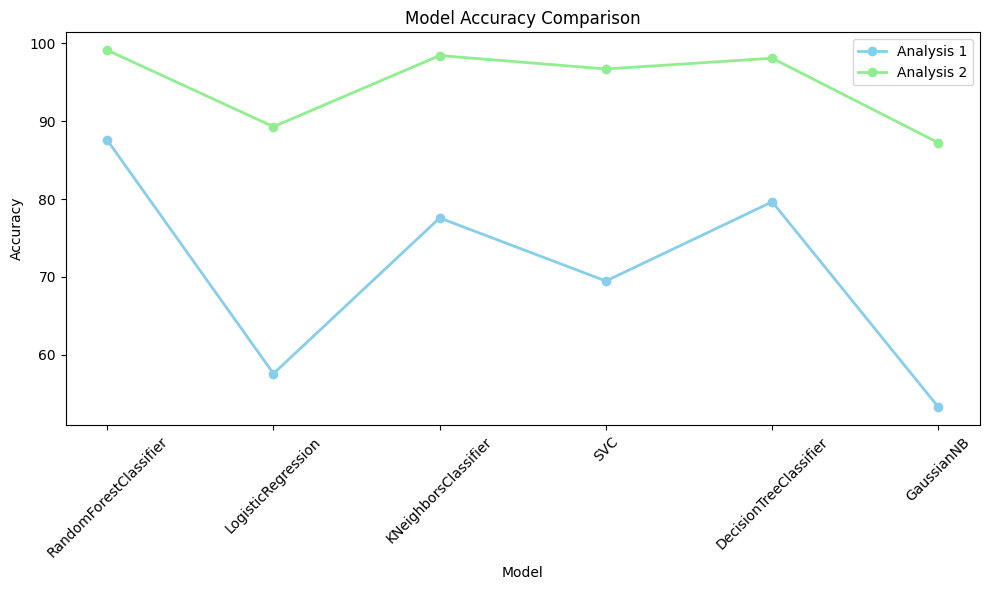

In [33]:
# Aligning the dataframes to ensure they have the same number of models
min_length = min(len(analysis1), len(analysis2))  # Choose the smaller size to avoid mismatch
analysis1 = analysis1.head(min_length)
analysis2 = analysis2.head(min_length)

# Set up the positions for the lines of both datasets
index = np.arange(len(analysis1))

# Create a figure
plt.figure(figsize=(10, 6))

# Plot the first dataset (analysis1) as a line plot
plt.plot(index, analysis1['Accuracy'], marker='o', color='skyblue', label='Analysis 1', linestyle='-', linewidth=2)

# Plot the second dataset (analysis2) as a line plot
plt.plot(index, analysis2['Accuracy'], marker='o', color='lightgreen', label='Analysis 2', linestyle='-', linewidth=2)

# Add labels, title, and legends
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(index, analysis1['Model'], rotation=45)  # Set the x-ticks to the model names
plt.title('Model Accuracy Comparison')
plt.legend()

# Display the plot
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()


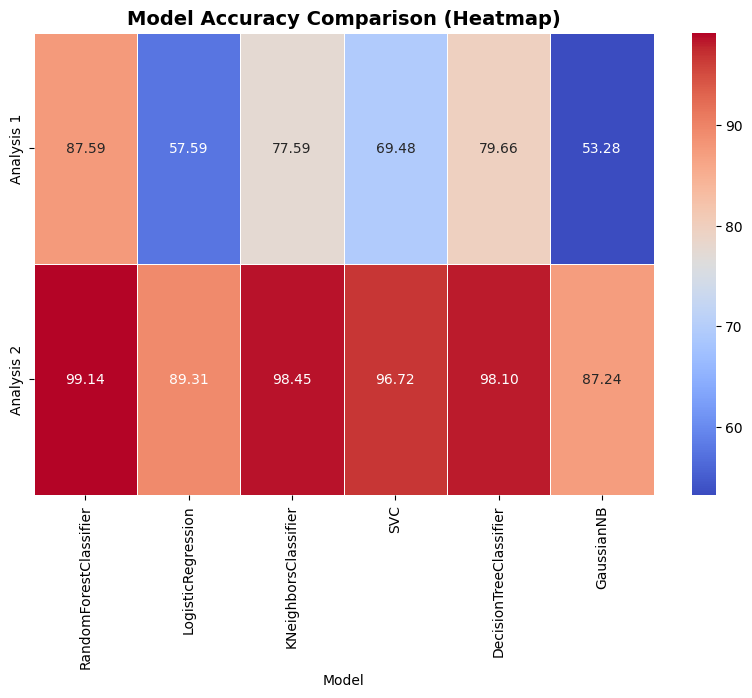

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for the accuracy values
import pandas as pd
accuracy_data = pd.DataFrame({
    'Model': analysis1['Model'],
    'Analysis 1': analysis1['Accuracy'],
    'Analysis 2': analysis2['Accuracy']
})

# Set 'Model' column as index
accuracy_data.set_index('Model', inplace=True)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(accuracy_data.T, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)

# Add title
plt.title('Model Accuracy Comparison (Heatmap)', fontsize=14, weight='bold')

plt.show()
